implement linear regression

In [1]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coffee-reviews-dataset/simplified_coffee.csv
/kaggle/input/coffee-reviews-dataset/coffee_analysis.csv


# Importing Data

In [2]:
import pandas as pd

coffee = pd.read_csv('/kaggle/input/coffee-reviews-dataset/coffee_analysis.csv')

In [3]:
print(coffee.columns.values)

['name' 'roaster' 'roast' 'loc_country' 'origin_1' 'origin_2' '100g_USD'
 'rating' 'review_date' 'desc_1' 'desc_2' 'desc_3']


# Preprocessing Data

In [4]:
coffee_simple = coffee[['rating', '100g_USD']].copy()
coffee_simple.rename(columns={'100g_USD': 'price'}, inplace=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
 
coffee_scaled = scaler.fit_transform(coffee_simple.to_numpy())
coffee_scaled = pd.DataFrame(coffee_scaled, columns=['rating', 'price'])

scaler2 = StandardScaler()

coffee = scaler2.fit_transform(coffee_scaled.to_numpy())
coffee = pd.DataFrame(coffee, columns=['rating', 'price'])



In [6]:
coffee_scaled.head()

,rating,price
0,0.785714,0.107446
1,0.714286,0.067570
2,0.571429,0.034655
3,0.571429,0.030796
4,0.714286,0.035790


In [7]:
coffee.head()

,rating,price
0,1.206871,0.437235
1,0.566933,-0.023916
2,-0.712943,-0.404563
3,-0.712943,-0.449190
4,0.566933,-0.391437


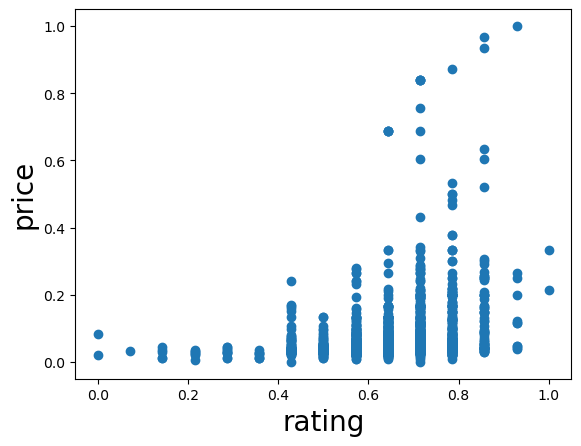

In [8]:
import matplotlib.pyplot as plt

plt.scatter(coffee_scaled.rating, coffee_scaled.price)
 
plt.xlabel('rating', fontsize = 20)
 
plt.ylabel('price', fontsize = 20)
 
plt.show()

# Training and Test Set

In [9]:
from sklearn.model_selection import train_test_split

y = coffee_scaled.price

X = coffee_scaled.drop(columns=['price'])

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Testing Linear Regression

In [10]:
from sklearn.tree import DecisionTreeRegressor

r = DecisionTreeRegressor(random_state=0)

r.fit(X_train, y_train)

y_pred = r.predict(X_val)

In [11]:
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_val, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_val, y_pred), 2))

Mean absolute error = 0.04
Mean squared error = 0.01
Median absolute error = 0.02
Explain variance score = 0.03
R2 score = 0.03
